# Questions that I've taken into consideraton while solving this assignmment are:
1)in which borough, people prefer to buy their properties?

2)Which neighborhoods are considered as hi-fi areas in terms of financial value?

3)In which time of the year, property dealers make the most sales?

4)What is the average number of residential and commercial units on different properties?

5)Which neighborhood is most famous among the public?

6)What is the highest number of properties in a LOT?

In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading data
df = pd.read_csv("nyc-rolling-sales-dirty.csv")

C:\Users\Abc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,No Number,,65000,NaN,...,5,0,5,1633,6440,1900,2,C2,6625000,why
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,,C7,NaN,...,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,,C7,NaN,...,16,1,17,2212,7803,1900,2,C7,-,12/9/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,,C4,NaN,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,,C2,NaN,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00


In [4]:
df.dtypes

Unnamed: 0                          int64
BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                             float64
LOT                                object
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                          float64
RESIDENTIAL UNITS                   int64
COMMERCIAL UNITS                    int64
TOTAL UNITS                         int64
LAND SQUARE FEET                   object
GROSS SQUARE FEET                  object
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                         object
SALE DATE                          object
dtype: object

In [5]:
#checking how many incorrect values are there for dates column
incorrect_sale_date = pd.to_datetime(df['SALE DATE'], errors='coerce').isnull().sum() - df['SALE DATE'].isnull().sum()
print("Incorrect sale date = %d" % incorrect_sale_date)

incorrect_year_built = pd.to_datetime(df['YEAR BUILT'], errors='coerce').isnull().sum() - df['YEAR BUILT'].isnull().sum()
print("Incorrect year built = %d" % incorrect_year_built)

Incorrect sale date = 3
Incorrect year built = 0


In [6]:
#Since only SALE DATE column has incorrect values (YEAR BUILT column is already int type, its not detetcing 0 as incorrect)
#replacing incorrect values of SALE DATE column with nulls
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [7]:
#checking for total number of missing values in the entire dataset
df.isnull().sum()

Unnamed: 0                         0
BOROUGH                            0
NEIGHBORHOOD                      30
BUILDING CLASS CATEGORY           51
TAX CLASS AT PRESENT               7
BLOCK                             16
LOT                                0
EASE-MENT                          0
BUILDING CLASS AT PRESENT          0
ADDRESS                           45
APARTMENT NUMBER                   1
ZIP CODE                          36
RESIDENTIAL UNITS                  0
COMMERCIAL UNITS                   0
TOTAL UNITS                        0
LAND SQUARE FEET                   0
GROSS SQUARE FEET                  0
YEAR BUILT                         0
TAX CLASS AT TIME OF SALE          0
BUILDING CLASS AT TIME OF SALE     0
SALE PRICE                         0
SALE DATE                          3
dtype: int64

In [8]:
#Dropping irrelevant columns that contain null values
df = df.drop('TAX CLASS AT PRESENT', axis=1)
df = df.drop('BLOCK', axis=1)
df = df.drop('ADDRESS', axis=1)
df = df.drop('APARTMENT NUMBER', axis=1)
df = df.drop('ZIP CODE', axis=1)

In [9]:
df.isnull().sum()

Unnamed: 0                         0
BOROUGH                            0
NEIGHBORHOOD                      30
BUILDING CLASS CATEGORY           51
LOT                                0
EASE-MENT                          0
BUILDING CLASS AT PRESENT          0
RESIDENTIAL UNITS                  0
COMMERCIAL UNITS                   0
TOTAL UNITS                        0
LAND SQUARE FEET                   0
GROSS SQUARE FEET                  0
YEAR BUILT                         0
TAX CLASS AT TIME OF SALE          0
BUILDING CLASS AT TIME OF SALE     0
SALE PRICE                         0
SALE DATE                          3
dtype: int64

In [10]:
#finding modes of all categroical data that has null value
print(df['NEIGHBORHOOD'].mode())
print(df['BUILDING CLASS CATEGORY'].mode())

0    FLUSHING-NORTH
dtype: object
0    01 ONE FAMILY DWELLINGS                    
dtype: object


In [11]:
#filling null values of categorical data with their mode value 
df['NEIGHBORHOOD'].fillna('FLUSHING-NORTH', inplace=True)
df['BUILDING CLASS CATEGORY'].fillna('01 ONE FAMILY DWELLINGS', inplace=True)


In [12]:
#dropping the rows that has null sale date
df = df.drop(df[(df['SALE DATE'].isnull())].index)


In [13]:
df.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [14]:
#dropping columns that do not seem to aid us in finding the solution to above mentioned questions
df = df.drop('EASE-MENT', axis=1)
df = df.drop('TOTAL UNITS', axis=1)
df = df.drop('LAND SQUARE FEET', axis=1)
df = df.drop('GROSS SQUARE FEET', axis=1)
df = df.drop('TAX CLASS AT TIME OF SALE', axis=1)
df = df.drop('BUILDING CLASS AT TIME OF SALE', axis=1)

In [15]:
df.dtypes

Unnamed: 0                            int64
BOROUGH                               int64
NEIGHBORHOOD                         object
BUILDING CLASS CATEGORY              object
LOT                                  object
BUILDING CLASS AT PRESENT            object
RESIDENTIAL UNITS                     int64
COMMERCIAL UNITS                      int64
YEAR BUILT                            int64
SALE PRICE                           object
SALE DATE                    datetime64[ns]
dtype: object

In [16]:
#replacing hyphens with null values in sale price
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], downcast='integer', errors='coerce')

In [17]:
df.isnull().sum()

Unnamed: 0                       0
BOROUGH                          0
NEIGHBORHOOD                     0
BUILDING CLASS CATEGORY          0
LOT                              0
BUILDING CLASS AT PRESENT        0
RESIDENTIAL UNITS                0
COMMERCIAL UNITS                 0
YEAR BUILT                       0
SALE PRICE                   14559
SALE DATE                        0
dtype: int64

In [18]:
#replacing nul values with mean of the sale price
df['SALE PRICE'].fillna(df['SALE PRICE'].mean(), inplace=True)

In [19]:
df.isnull().sum()

Unnamed: 0                   0
BOROUGH                      0
NEIGHBORHOOD                 0
BUILDING CLASS CATEGORY      0
LOT                          0
BUILDING CLASS AT PRESENT    0
RESIDENTIAL UNITS            0
COMMERCIAL UNITS             0
YEAR BUILT                   0
SALE PRICE                   0
SALE DATE                    0
dtype: int64

(array([18304.,     0.,  7049.,     0.,     0., 24047.,     0., 26735.,
            0.,  8410.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

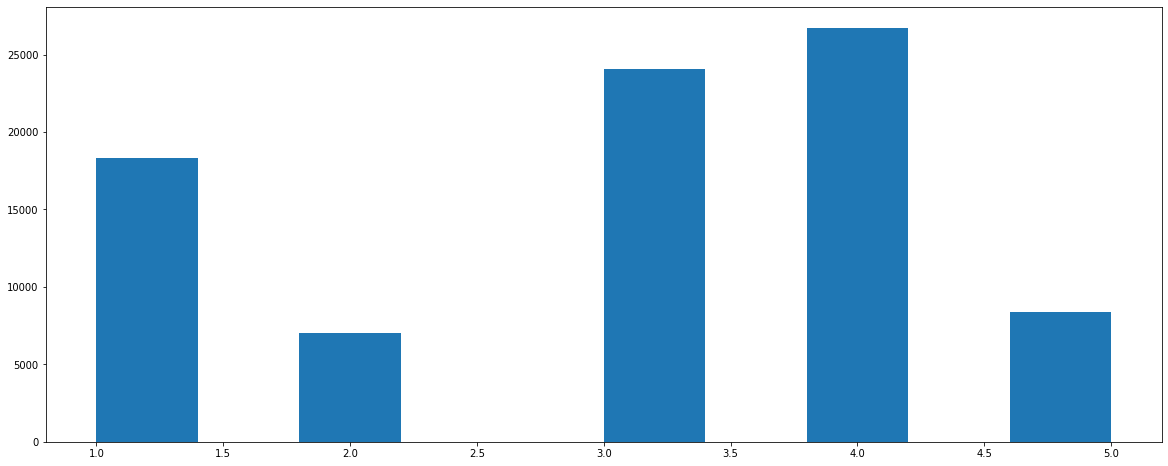

In [20]:
plt.figure(figsize=[20,8])
plt.hist(df['BOROUGH'])

In [21]:
#Above histogram answers the first question that large number of properties are located in Borough no. 4(queens) & 3(Brooklyn) 
#which means that people prefer to buy their property mostly in Queens borough and then in Brooklyn

C:\Users\Abc\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([12338., 12400., 12595., 11386., 12599., 12190., 11037.]),
 array([736208., 736260., 736312., 736364., 736416., 736468., 736520.,
        736572.]),
 <a list of 7 Patch objects>)

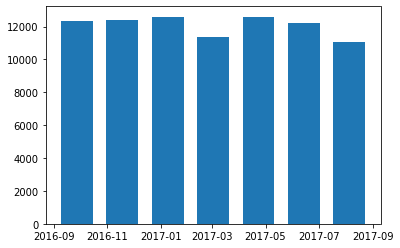

In [22]:
#plt.figure(figsize=[20,8])
plt.hist(df['SALE DATE'], rwidth=0.7, bins = 7)

In [23]:
#Above histogram answers the 3rd question i.e. the month of january and may bring the most number of sales for property dealers.

<BarContainer object of 84545 artists>

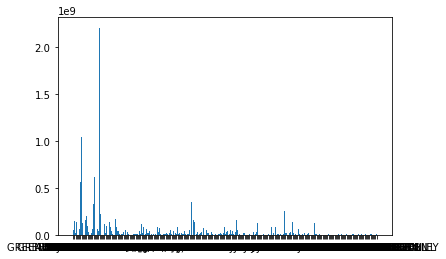

In [24]:
plt.bar(df['NEIGHBORHOOD'], df['SALE PRICE']) #proper visualization of below bargraph will answer question no 2 

In [32]:
#replacing non-numeric data with null values in LOT
df['LOT'] = pd.to_numeric(df['LOT'], downcast='integer', errors='coerce')

print(df['LOT'].mode())

0    1.0
dtype: float64


In [33]:
#replacing nul values with mode of LOT
df['LOT'].fillna(1.0, inplace=True)

(array([6.3272e+04, 1.9368e+04, 1.1480e+03, 2.9600e+02, 2.8100e+02,
        7.8000e+01, 3.1000e+01, 2.0000e+01, 2.0000e+01, 3.1000e+01]),
 array([1.0000e+00, 9.1150e+02, 1.8220e+03, 2.7325e+03, 3.6430e+03,
        4.5535e+03, 5.4640e+03, 6.3745e+03, 7.2850e+03, 8.1955e+03,
        9.1060e+03]),
 <a list of 10 Patch objects>)

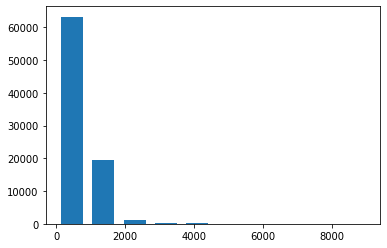

In [36]:
plt.hist(df['LOT'], rwidth=0.7)

In [37]:
#Above histogram answers the last question i.e. largest number of properties is above 60K in a LOT.